In [ ]:
import pandas as pd 
# 웹 서버에 요청을 보내고 응답 메시지 받는 기능능
import requests
# 크롤링 기능
from bs4 import BeautifulSoup as bs
# 웹 브라우져를 제어 
from selenium import webdriver
# 브라우져의 태그를 검색
from selenium.webdriver.common.by import By
# 키보드의 특수 이벤트(ENTER, DELETE, CLEAR, ...)
from selenium.webdriver.common.keys import Keys

- 네이버 증권 
    - 종목코드를 이용하여 검색 
        - url의 규칙 확인
    - 뉴스 탭에 더보기 버튼을 선택
        - 클릭 이벤트 발생하여 페이지 이동
        - url의 규칙 확인
    - 뉴스 리스트에 있는 하이퍼링크의 주소를 모두 리스트의 형태로 저장
        - requests라이브러리를 이용하여 해당 주소로 요청 
            - 정보를 확인
            - 기사의 내용이 모두 응답 메시지에 존재한다면 제목, 본문 내용으로 1차원 리스트 생성 
            - 모든 기사 내용을 리스트 추가(2차원 리스트)
            - pandas 이용하여 데이터프레임을 생성
            - csv 파일로 저장 (파일의 이름에 현재 시간을 대입해서 파일 중복 방지)

In [18]:
url = "https://finance.naver.com/item/main.naver?code="

code = '012450'

In [19]:
# 웹 브라우져 오픈
driver = webdriver.Chrome()

In [20]:
# 특정 주소를 요청을 보낸다 . 
driver.get(url+code)

In [21]:
# driver에서 html 코드를 불러와서(웹 브라우져에 page_source) 
# BeautifulSoup를 이용하여 데이터를 파싱(class 생성)
soup = bs(driver.page_source, 'html.parser')

In [7]:
len(driver.page_source)

170933

In [22]:
# div 태그 중에 class의 값이 news_section 인 태그의 개수를 확인
len(
    soup.find_all(
        'div', 
        attrs = {
            'class' : 'news_section'
        }
    )
)
# div태그에서 _replaceNewsLink 태그는 iframe 태그에 존재
# 다른 화면(다른 url)에 태그가 존재 

1

In [23]:
# div 태그 중 class가 news_section이라는 태그를 추출 
div_data = soup.find(
    'div', 
    attrs = {
        'class' : 'news_section'
    }
)

In [24]:
# div_data에서 li태그를 모두 검색
li_list = div_data.find_all('li')

In [25]:
len(li_list)

10

In [26]:
# li_list 각 원소들의 첫번째 a태그를 선택하여 
# href의 속성 값을 이용하여 새로운 리스트 생성
href_list = []

for li_data in li_list:
    # li_data에서 첫번째 a태그를 추출 -> href 속성의 값을 추출
    data = li_data.find('a')['href']
    # href_list에 추가 
    href_list.append(data)

In [27]:
href_list

['/item/news_read.naver?article_id=0005320445&office_id=014&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0002441452&office_id=016&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0005961677&office_id=018&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0000429454&office_id=374&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0008127189&office_id=421&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0005560024&office_id=277&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0005165112&office_id=008&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0002441414&office_id=016&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0015262465&office_id=001&code=012450&sm=entity_id.basic',
 '/item/news_read.naver?article_id=0002940864&office_id=029&code=012450&sm=entity_id.basic']

In [28]:
base_url = "https://finance.naver.com"

In [29]:
href_list[0]

'/item/news_read.naver?article_id=0005320445&office_id=014&code=012450&sm=entity_id.basic'

In [30]:
driver.get(base_url+href_list[0])

'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36"><head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no">\n\t\t<meta property="og:title" content="방산주 연일 랠리...현대로템·한화에어로 \'불기둥\' [특징주]">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/article/014/0005320445">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/014/2025/03/13/0005320445_001_20250313100012762.jpg?type=w800">\n\t\t<meta property="og:description" content="국내 방산주가 장 초반 급등하고 있다. 유럽 방위비 증액 기대감이 여전한 데다 증권가에서 한화에어로스페이스에 대한 목표주가를 상향한 영향으로 풀이된다. 13일 오전 9시34분 현대로템은 전 거래일 대비 7.10% 상">\n\t\t<meta property="og:article:author" content="파이낸셜뉴스 | 네이버">\n\t\t<meta name="twitter:card" cont
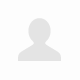
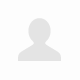

In [33]:
driver.page_source